**Proyek Akhir : Klasifikasi Gambar**

*   Nama : Zullinira Dwi Utami
*   Email : zullinira23@gmail.com
*   Alamat : Kabupaten Padang Pariaman, Sumatera Barat












**Import Package **

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download dataset

In [7]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /content/rockpaperscissors.zip

--2021-07-12 14:36:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rockpaperscissors.zip’

/content/rockpapers 100%[===================>] 307.92M  7.15MB/s    in 41s     

2021-07-12 14:37:29 (7.46 MB/s) - ‘/content/rockpaperscissors.zip’ saved [322873683/322873683]



Ekstrak Zip File

In [8]:
import zipfile
import os

In [9]:
local_zip ='/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Membuat direktori untuk data train dan data validasi

In [11]:
base_dir = '/content/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [12]:
os.mkdir(train_dir)

In [13]:
os.mkdir(validation_dir)

cek direktori 

In [14]:
os.listdir('/content/rockpaperscissors')

['rock',
 'val',
 'train',
 'paper',
 'rps-cv-images',
 'README_rpc-cv-images.txt',
 'scissors']

Membagi direktori train dan val

In [15]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

Bagi direktori pada train dan validasi masing2 dengan rock, paper, scissors

In [16]:
train_rock_dir = os.path.join(train_dir,'rock')
validation_rock_dir = os.path.join(validation_dir,'rock')

train_paper_dir = os.path.join(train_dir,'paper')
validation_paper_dir = os.path.join(validation_dir,'paper')

train_scissors_dir = os.path.join(train_dir,'scissors')
validation_scissors_dir = os.path.join(validation_dir,'scissors')

In [17]:
os.mkdir(train_rock_dir)
os.mkdir(validation_rock_dir)

os.mkdir(train_paper_dir)
os.mkdir(validation_paper_dir)

os.mkdir(train_scissors_dir)
os.mkdir(validation_scissors_dir)

cek jumlah data(gambar) yang dimiliki pada masing - masing folder

In [18]:
#jumlah rock
print("jumlah gambar rock :", len(os.listdir('/content/rockpaperscissors/rock')))

#jumlah paper
print("jumlah gambar paper :", len(os.listdir('/content/rockpaperscissors/paper')))

#jumlah scissors
print("jumlah gambar scissors :", len(os.listdir('/content/rockpaperscissors/scissors')))

jumlah gambar rock : 726
jumlah gambar paper : 712
jumlah gambar scissors : 750


split data (validasi dan training) pada masing-masing kategori

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
train_rock, validation_rock = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper, validation_paper = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors, validation_scissors = train_test_split(os.listdir(scissors_dir), test_size=0.4)

Mengcopy data dan membagi berdasarkan kategori

In [23]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [27]:
for i in train_rock:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(train_rock_dir,i))
for i in train_paper:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper_dir,i))
for i in train_scissors:
   shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors_dir,i))

In [28]:
for i in validation_rock:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(validation_rock_dir,i))
for i in validation_paper:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper_dir,i))
for i in validation_scissors:
   shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors_dir,i))

cek jumlah data di train dan val

In [29]:
print(' jumlah data rock di train=', len(os.listdir('/content/rockpaperscissors/train/rock')))
print(' jumlah data rock di validasi=', len(os.listdir('/content/rockpaperscissors/val/rock')))

 jumlah data rock di train= 435
 jumlah data rock di validasi= 291


In [30]:
print(' jumlah data paper di train=', len(os.listdir('/content/rockpaperscissors/train/paper')))
print(' jumlah data paper di validasi=', len(os.listdir('/content/rockpaperscissors/val/paper')))

 jumlah data paper di train= 427
 jumlah data paper di validasi= 285


In [31]:
print(' jumlah data scissors di train=', len(os.listdir('/content/rockpaperscissors/train/scissors')))
print(' jumlah data scissors di validasi=', len(os.listdir('/content/rockpaperscissors/val/scissors')))

 jumlah data scissors di train= 450
 jumlah data scissors di validasi= 300


Augumentasi dan Image Data Generator

In [32]:
#menerapkan augmentasi data generator
data_train_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=23,
                                          horizontal_flip=True,
                                          shear_range=0.2,
                                          fill_mode="nearest"
                                          )
data_val_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=23,
                                          horizontal_flip=True,
                                          shear_range=0.2,
                                          fill_mode="nearest"
                                          )


In [34]:
train_generator = data_train_generator.flow_from_directory(train_dir,
                                                           target_size = (150,150),
                                                           batch_size = 32,
                                                           class_mode="categorical")

val_generator = data_val_generator.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size = 32,
                                                       class_mode="categorical")

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Model Sequential

In [35]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Flatten, Conv2D, MaxPool2D

In [36]:
#buat jaringan syaraf tiruan model CNN
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

#buat hiden layer
model.add(Dense(512, activation="relu"))

# Layer output
model.add(Dense(3, activation="softmax"))

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [38]:
history = model.fit(train_generator,
                    steps_per_epoch =25,
                    epochs = 20,
                    validation_data = val_generator,
                    validation_steps = 4,
                    verbose = 2)

Epoch 1/20
25/25 - 41s - loss: 1.1536 - accuracy: 0.3088 - val_loss: 1.0982 - val_accuracy: 0.3281
Epoch 2/20
25/25 - 39s - loss: 1.0942 - accuracy: 0.3388 - val_loss: 1.0569 - val_accuracy: 0.5078
Epoch 3/20
25/25 - 40s - loss: 0.9519 - accuracy: 0.5337 - val_loss: 0.7544 - val_accuracy: 0.6875
Epoch 4/20
25/25 - 40s - loss: 0.6952 - accuracy: 0.7350 - val_loss: 0.5928 - val_accuracy: 0.7734
Epoch 5/20
25/25 - 40s - loss: 0.5188 - accuracy: 0.8075 - val_loss: 0.3900 - val_accuracy: 0.8359
Epoch 6/20
25/25 - 40s - loss: 0.3279 - accuracy: 0.8850 - val_loss: 0.4934 - val_accuracy: 0.7812
Epoch 7/20
25/25 - 40s - loss: 0.3265 - accuracy: 0.8788 - val_loss: 0.2974 - val_accuracy: 0.8828
Epoch 8/20
25/25 - 40s - loss: 0.2304 - accuracy: 0.9225 - val_loss: 0.4435 - val_accuracy: 0.8516
Epoch 9/20
25/25 - 40s - loss: 0.2306 - accuracy: 0.9112 - val_loss: 0.1955 - val_accuracy: 0.9297
Epoch 10/20
25/25 - 39s - loss: 0.2213 - accuracy: 0.9262 - val_loss: 0.3559 - val_accuracy: 0.8984
Epoch 11/

**Upload File**

In [40]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

In [42]:
uploaded = files.upload()


Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png


[[0. 1. 0.]]
0bioBZYFCXqJIulm.png
rock


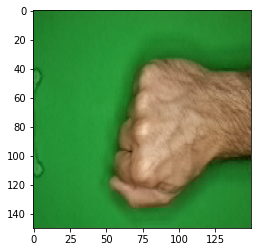

In [43]:
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')

Saving OXA4uaaO7YUkxjSJ.png to OXA4uaaO7YUkxjSJ.png
[[1. 0. 0.]]
0bioBZYFCXqJIulm.png
paper


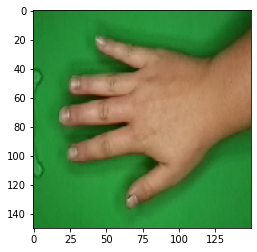

In [44]:
uploaded = files.upload()

for folder in uploaded.keys():
  path = folder
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')

Saving H9H5HhYMY6vhEUJ4.png to H9H5HhYMY6vhEUJ4.png
[[0. 0. 1.]]
0bioBZYFCXqJIulm.png
scissors


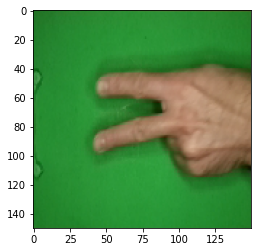

In [45]:
uploaded = files.upload()

for folder in uploaded.keys():
  path = folder
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(fn)
  
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')